#### Different Types of Missing data:

(1). Missing completely at random(MCAR) - (NO SYSTEMATIC DIFFERENCES EXIST):

        >>> when the data is in MCAR, there is absolutely no relationship between the missing data and any other values, observed or missing within the dataset. those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

(2). Missing data not at random(MNAR) - Systematic missing values 
        >>> There is absolutely some relationship between the data missing and any other values, observed or missing within the dataset
        
(3). Missing at Random (MAR)



# (1). Missing completely at random(MCAR)

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# (2). Missing data not at random(MNAR) - Systematic missing values

In [4]:
import numpy as np

In [5]:
df["Cabin_null"] = np.where(df["Cabin"].isnull(),1,0) #(Condition, True, False)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [7]:
#Finding the average:

df["Cabin_null"].mean()

0.7710437710437711

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.groupby("Survived")["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# (3).MISSING AT RANDOM

Men hiding their salary , women hiding their age & son hiding his smoking habits infront of his parent

# ALL TECHNIQUES OF HANDLING MISSING VALUES:

1) Mean/median/mode imputations

2) Random sample imputation

3) capturing NaN values with new features

4) End of distribution imputation

5) Arbitrary imputation

6) Frequent categories imputation

# (1) MEAN/ MEDIAN / MODE IMPUTATION:

When we should apply, MISSING COMPLETELY AT RANDOM(MCAR), WE SOLVE THIS BY REPLACING THE NAN WITH MOST FREQUENTLY OCCCURING OF THE VARIABLES

In [10]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
#Let's see the percentages of missing values:

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)  #Bcz if we use the mean the outliers will affect the results.thats y median we are choosing..
    

In [13]:
median = df["Age"].median()
median

28.0

In [14]:
impute_nan(df, "Age", median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [15]:
# Let's check the standard deviation of "Age", "Age_Median"

print(df["Age"].std())
print(df["Age_median"].std())   #Result looks having very small change, but still imputation will give you better results.

14.526497332334044
13.019696550973194


In [16]:
#Let's visulize:

import matplotlib.pyplot as plt
%matplotlib inline

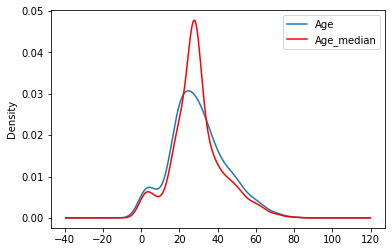

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde", ax=ax)
df["Age_median"].plot(kind="kde", ax=ax, color="red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

#### Advantages and disadvantages of Mean / Median / Mode Imputation:

#### Advantages
1) Easy to implement (Robust to outliers)
2) Faster way to obtain the complete dataset

#### Disadvantages
1) Change or Distortion in the original varience
2) Impacts the Correlation

# 2) Random Sample Imputation

Random sample imputation consist of taking random observations from the dataset and using this random value observation we will be replacing those NaN values

when should we use this? When data are completely at random (MCAR)

In [18]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df["Age"].dropna().sample()  #It will vary in every refresh

49    18.0
Name: Age, dtype: float64

In [22]:
df["Age"].isnull().sum()

177

In [23]:
df["Age"].dropna().sample()  
#perhaps, without dropping NaN if we take sample, it may give you NaN also sometimes, That is y dropna() fun.

207    26.0
Name: Age, dtype: float64

In [24]:
def impute_nan(df, variable, median):
    df[variable+"_Median"] = df[variable].fillna(median)
    df[variable+"_Random"] = df[variable]
    
    #It will have the random sample to fill the NaN:
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    #Pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_Random"] = random_sample

In [25]:
Median = df["Age"].median()
Median

28.0

In [26]:
impute_nan(df, "Age", Median)

In [27]:
df.head()

,Survived,Age,Fare,Age_Median,Age_Random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


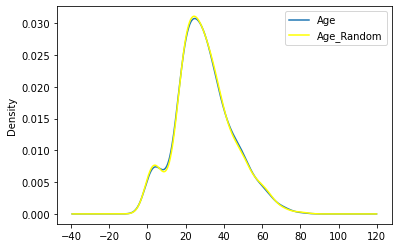

In [28]:
# Let's see the visuals:

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde", ax=ax)
df["Age_Random"].plot(kind="kde", ax=ax, color="yellow")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

'''Woooooaw, In Mean/Median/mode NAN Replacing Technique there is disadvantage called it has distortion in original varience.
but RANDOM SAMPLE METHOD OF HANDLING MISSING VALUE eliminates that con '''

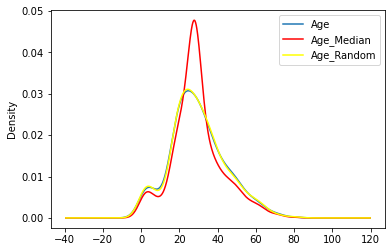

In [29]:
#Let's plot variable_median too in visuals:

fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde", ax=ax)
df["Age_Median"].plot(kind="kde", ax=ax, color="red")
df["Age_Random"].plot(kind="kde", ax=ax, color="yellow")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")


###Pros:

1) easy to implement
2) there is less distortion

###Cons:

1) In every situation randomness won't work

# (3) CAPTURING NAN VALUES WITH A NEW FEATURE:
    
    THIS WILL WORK WELL, WHEN?
                            IF THE DATA ARE NOT MISSING COMPLETELY RANDOM
    

In [30]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
import numpy as np

df["Age_New_F"] = np.where(df["Age"].isnull(),1,0)

In [32]:
df.head() 

,Survived,Age,Fare,Age_New_F
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [33]:
df["Age"].mean()

29.69911764705882

In [34]:
# So Now i can see the changes very Easily..

df["Age"] = df["Age"].fillna(df["Age"].mean())

In [35]:
#YOU CAN SEE CLEARLY THAT CAPTURING NAN VALUES WITH A NEW FEATURE HELPS TO UNDERSTAND THE NULL VAL COLUMN VAL REPLACEMENT

df[df["Age_New_F"]==1]

,Survived,Age,Fare,Age_New_F
5,0,29.699118,8.4583,1
17,1,29.699118,13.0000,1
19,1,29.699118,7.2250,1
26,0,29.699118,7.2250,1
28,1,29.699118,7.8792,1
...,...,...,...,...
859,0,29.699118,7.2292,1
863,0,29.699118,69.5500,1
868,0,29.699118,9.5000,1
878,0,29.699118,7.8958,1


# PROS:

(1) Very Easy to implement
(2) Capturing the importance of Missing Values

###CONS
(1) Perhaps i wanna change 10 features missing values, for that additionally 10 features need to be created.
that is called ""curse of dimensionality""..
so if less feature na val replacemnet then it is good to use..

# (4). END OF DISTRIBUTION IMPUTATION

In [36]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


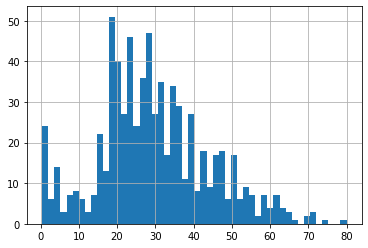

In [37]:
df["Age"].hist(bins=50)

In [ ]:
'''So here we gonna take the value of end distribution(which is not a mean,median,mode)
means more than 3sd value and replace it with NAN'''

In [42]:
extreme = df['Age'].mean()+(3*df["Age"].std())

In [40]:
import seaborn as sns

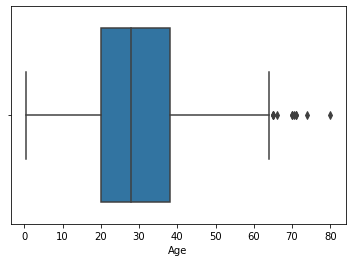

In [41]:
sns.boxplot("Age", data=df) #You can clearly see the Outliers

In [43]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_End_Distribution"] = df[variable].fillna(extreme) #Also i have created a new feature which is replaced by extreme value
    df[variable].fillna(median, inplace=True)  #I have filled all the Nan val with Median here

In [47]:
impute_nan(df, "Age", df["Age"].median(), extreme)

In [48]:
df.head()

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


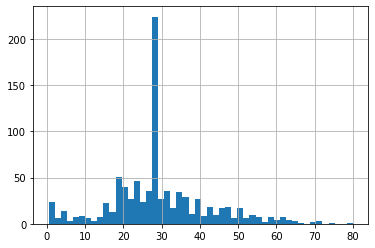

In [49]:
#Let's see the difference between Age and Age_End_Distribution:abs

df["Age"].hist(bins=50) #bcz all the NAN got replaced with Median

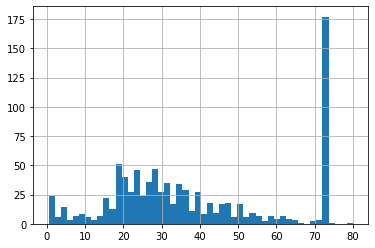

In [50]:
df["Age_End_Distribution"].hist(bins=50)  #Bcz all the Nan got replaced with End_Dist value

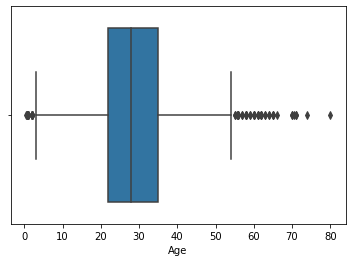

In [51]:
#Let's see the visual with Box plot:

sns.boxplot("Age", data=df)

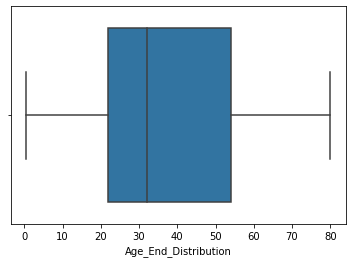

In [52]:
sns.boxplot("Age_End_Distribution", data=df)

So look at what happens the outliers got eliminated..
so even in feature engineering too there are many way, we need to check each and everything before proceeding the problem and 
choose the best which suits

### ADV:

1) Captures the imp of missingness is there is one

###Disadv:

1) Distorts the original distribution
2)

# (5). Arbitrary imputation:

This technique was derived from Kaggle Competition,
it consist of replacing Nan values with Arbitraty value

In [54]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
def impute_nan(df, variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)

In [60]:
impute_nan(df, "Age") ;
df.head(15)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


#Disadvantages:

#its hard to decide which value to use